In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from enum import Enum
import seaborn as sns

class Flag(Enum):
    GREEN = 0
    YELLOW = 1
    RED = 2
    UNKNOWN = -1


def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


n = 100
x = np.random.randint(1, 100, n)
y = np.random.randint(1, 100, n)
eps, minPts = 15, 3



In [94]:
def dbscan(x,y,n,eps,minPts):
    flags = []
    for i in range(0, n):
        neighb = -1
        for j in range(0, n):
            if dist(x[i], y[i], x[j], y[j]) < eps:
                neighb += 1
        if neighb >= minPts:
            flags.append(Flag.GREEN.value)
        else:
            flags.append(Flag.UNKNOWN.value)

    for i in range(0, n):
        if flags[i] == Flag.UNKNOWN.value:
            for j in range(0, n):
                if flags[j] == Flag.GREEN.value and dist(x[i], y[i], x[j], y[j]) < eps:
                    flags[i] = Flag.YELLOW.value
                    break
        if flags[i] == Flag.UNKNOWN.value:
            flags[i] = Flag.RED.value
    clusters = np.zeros(n)
    cl = 1

    for i in range(0, n):
        if flags[i] == Flag.GREEN.value:
            if clusters[i] == 0:
                clusters[i] = cl
                cl += 1
            for j in range(0, n):
                d = dist(x[i], y[i], x[j], y[j])
                if flags[j] == Flag.GREEN.value:
                    if d < eps:
                        clusters[j] = clusters[i] 
                if flags[j] == Flag.YELLOW.value:
                    if d < eps and d == min(dist(x[j], y[j], x[m], y[m]) for m in range(n) if flags[m] == Flag.GREEN.value):
                        clusters[j] = clusters[i] 
    
    return clusters


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

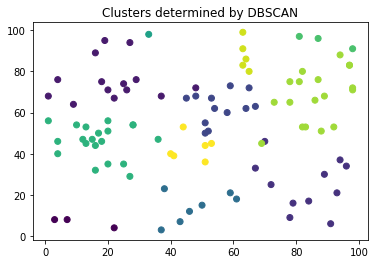

In [95]:
clusters = dbscan(x, y, n, eps, minPts)
plt.scatter(x, y, c=clusters)
plt.title("Clusters determined by DBSCAN")

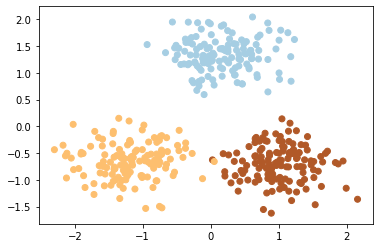

In [96]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[0.5, 2], [-1, -1], [1.5, -1]]
#Create dataset
X, y = make_blobs(n_samples=400, centers=centers, 
                  cluster_std=0.5, random_state=0)
#Normalize the values
X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0], X[:,1], c=y,cmap='Paired')

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

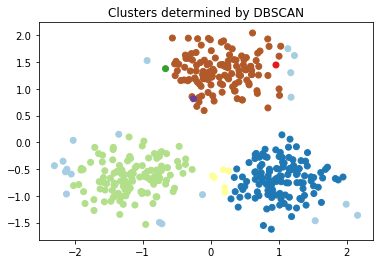

In [97]:
clusters = dbscan(X[:,0], X[:,1],400,0.4,20)
plt.scatter(X[:,0], X[:,1], c=clusters,cmap='Paired')
plt.title("Clusters determined by DBSCAN")